Name : Rauhan Ahmed Siddiqui

Task : Data Analysis on sports data

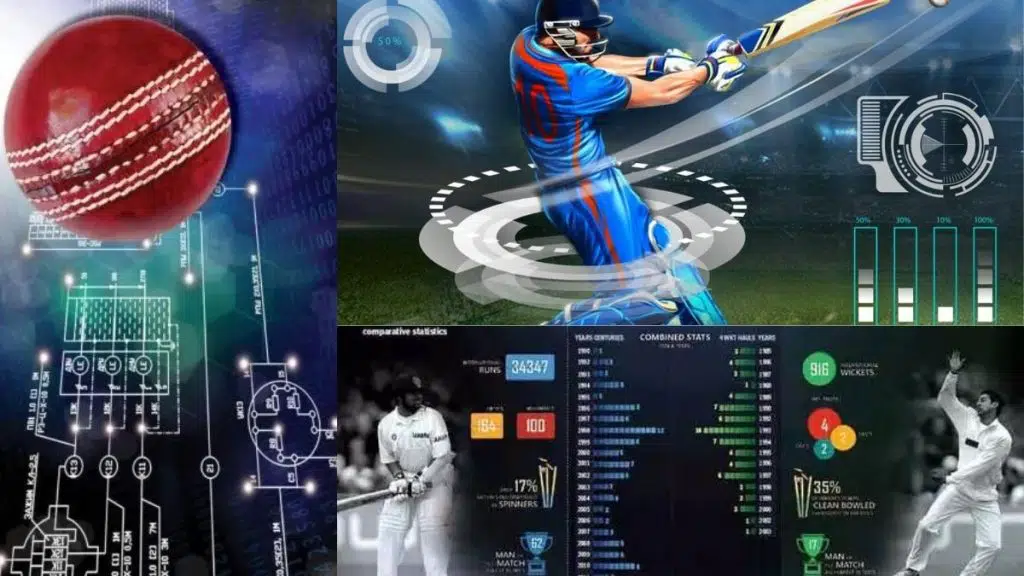

In [1]:
from PIL import Image
Image.open(r"/content/Crick-Analytics-1024x576.jpg.webp")

In [2]:
### unzipping the files containing data
!unzip /content/Indian_Premier_League.zip

Archive:  /content/Indian_Premier_League.zip
  inflating: deliveries.csv          
  inflating: matches.csv             


In [3]:
### importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
### setting maximum columns to display as 25
pd.set_option("display.max_columns", 25)

In [5]:
### reading the data using pandas
matches = pd.read_csv("/content/matches.csv")
deliveries = pd.read_csv("/content/deliveries.csv")

In [6]:
### displaying the data
print("Displaying matches dataframe :")
print("_" * 50 + "\t")
display(matches.head())

Displaying matches dataframe :
__________________________________________________	


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
### displaying other csv data file
print("Displaying deliveries dataframe :")
print("_" * 50 + "\t")
display(deliveries.head())

Displaying deliveries dataframe :
__________________________________________________	


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
### printing some basic information about the data
print("Number of records in matches dataframe : ", matches.shape[0])
print("Number of columns in matches dataframe : ", matches.shape[1])
print("_" * 50)
print("Number of records in deliveries dataframe : ", deliveries.shape[0])
print("Number of columns in deliveries dataframe : ", deliveries.shape[1])

Number of records in matches dataframe :  756
Number of columns in matches dataframe :  18
__________________________________________________
Number of records in deliveries dataframe :  179078
Number of columns in deliveries dataframe :  21


In [9]:
### printing the teams we have our data about
print("List of all unique teams : \n", matches.team1.unique())

List of all unique teams : 
 ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [10]:
### converting full team names to their short aliases
old_team_names = matches.team1.unique()
new_team_names = ['SRH', 'MI', 'GL', 'RPS', 'RCB', 'KKR', 'DD', 'KXIP', 'CSK', 'RR', 'DC',\
         'KTK', 'PW', 'RPS', 'DD']

matches = matches.replace(to_replace=old_team_names, value=new_team_names)
deliveries = deliveries.replace(to_replace=old_team_names, value=new_team_names)

In [11]:
matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [12]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


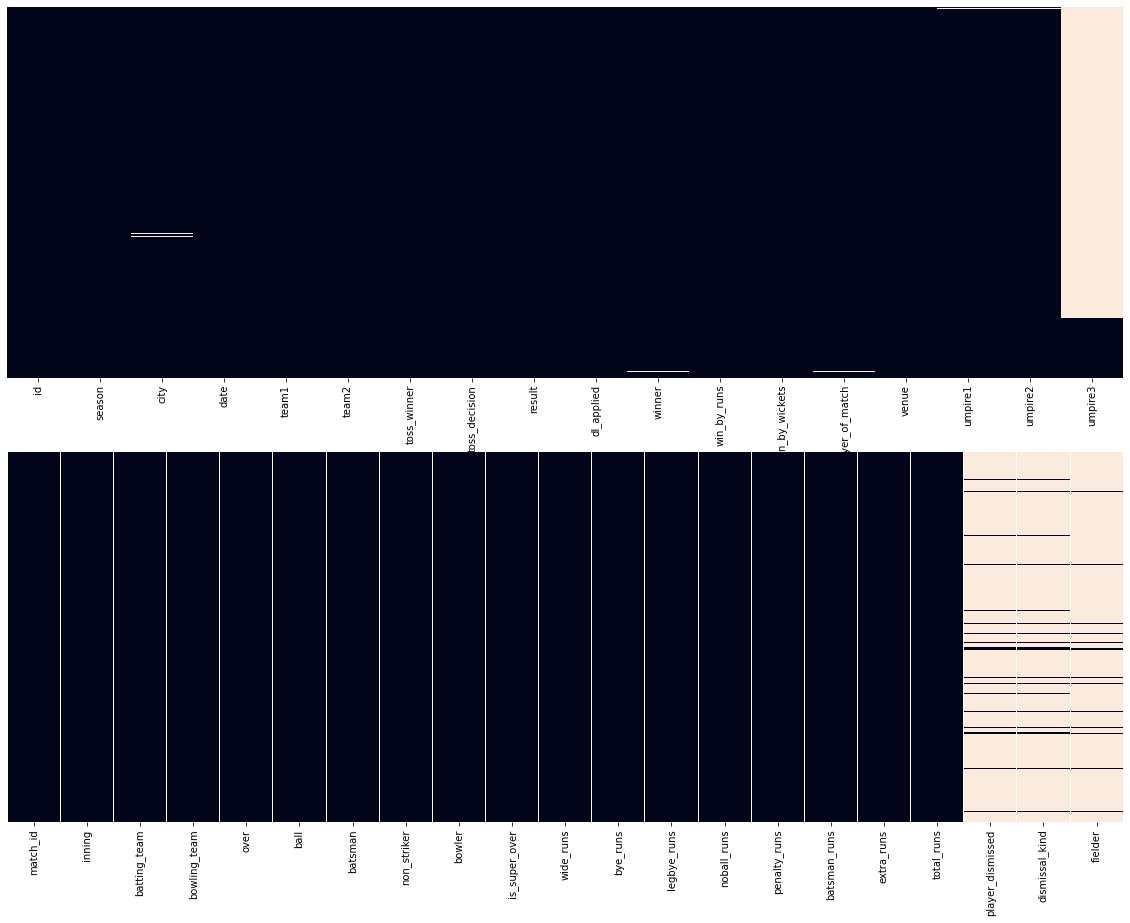

In [13]:
### displaying missing data
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (20,15))
ax1, ax2 = ax[0], ax[1]
sns.heatmap(matches.isnull(), cbar = False, yticklabels = False, ax=ax1)
sns.heatmap(deliveries.isnull(), cbar = False, yticklabels = False, ax=ax2)

In [14]:
### handling missing values in our data
def handle_missing_values(dataframe, threshold):
  cols = []
  for column in dataframe.columns:
    if dataframe[column].isnull().value_counts(normalize=True)[0] <= threshold:
      cols.append(column)
    else:
      pass

  dataframe = dataframe.drop(cols, axis = 1)
  dataframe = dataframe.dropna()

  return dataframe

In [15]:
### using the function handle_missing_values to free our data from missing values
matches = handle_missing_values(dataframe=matches, threshold=0.35)
deliveries = handle_missing_values(dataframe=deliveries, threshold=0.35)

In [16]:
matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan


In [17]:
### printing info about different cities in which matches took place
print("Unique values in city column in matches dataframe : ", matches.city.unique())

Unique values in city column in matches dataframe :  ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Mumbai' 'Kolkata' 'Bangalore'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Mohali'
 'Bengaluru']


In [18]:
### creating a dictionary having data of team names and a list containing the home grounds that have been used by them.
### source of info (internet)

home_grounds = {
    "SRH" : ["Hyderabad", "Visakhapatnam"],
    "MI" : ["Mumbai"],
    "GL" : ["Rajkot", "Kanpur"],
    "RPS" : ["Pune"],
    "KKR" : ["Kolkata"],
    "RCB" : ["Bangalore", "Bengaluru"],
    "DD" : ["Delhi", "Raipur"],
    "KXIP" : ["Indore", "Chandigarh", "Cuttack", "Dharamsala", "Mohali"],
    "CSK" : ["Chennai", "Ranchi"],
    "RR" : ["Jaipur"],
    "DC" : ["Hyderabad", "Cuttack", "Visakhapatnam", "Nagpur"],
    "KTK" : ["Kochi"],
    "PW" : ["Pune"]
}

In [19]:
### creating a new feature depicting whether a match was played on the home ground of some team or not 
is_home_ground = []

for i in range(len(matches)):
  if matches['city'].iloc[i] in home_grounds[matches['team1'].iloc[i]]:
    is_home_ground.append(matches['team1'].iloc[i])
  elif matches['city'].iloc[i] in home_grounds[matches['team2'].iloc[i]]:
    is_home_ground.append(matches['team2'].iloc[i])
  else:
    is_home_ground.append("None")

In [20]:
matches['home_ground'] = is_home_ground
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,home_ground
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,SRH
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,RPS
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,GL
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,KXIP
5,6,2017,Hyderabad,2017-04-09,GL,SRH,SRH,field,normal,0,SRH,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,SRH


In [21]:
### dropping useless columns
matches.drop(['city', 'date'], axis = 1, inplace=True)
matches.head(3)

,id,season,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,home_ground
0,1,2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,SRH
1,2,2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,RPS
2,3,2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,GL


In [22]:
matches.drop(['venue', 'umpire1', 'umpire2'], axis = 1, inplace = True)
matches.head(3)

,id,season,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,home_ground
0,1,2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,SRH
1,2,2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,RPS
2,3,2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,GL


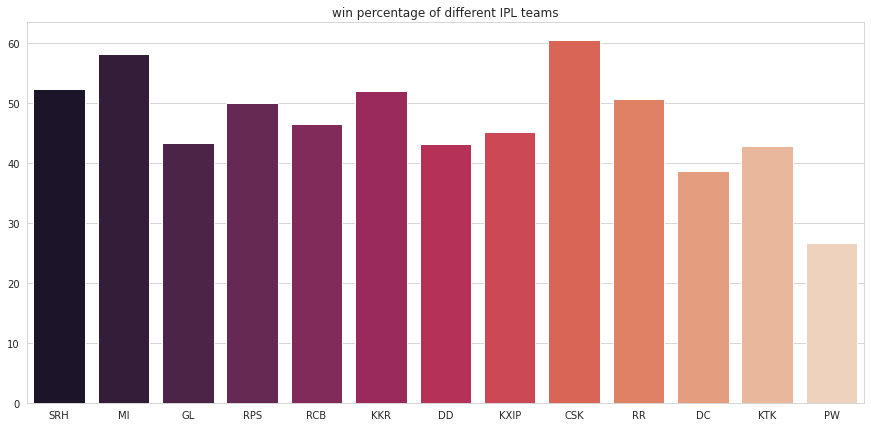

In [23]:
### comparing win percentages of different teams
win_percentage = {}
for team in new_team_names:
  matches_won = len(matches[((matches['winner'] == team) & (matches['result'] == 'normal'))])
  matches_played = len(matches[((matches['team1'] == team) | (matches['team2'] == team))])
  win_percent = (matches_won / matches_played) * 100
  win_percentage[team] = win_percent


plt.figure(figsize = (15,7))
sns.set_style("whitegrid")
plot = sns.barplot(x = list(win_percentage.keys()), y = list(win_percentage.values()), palette='rocket').set(title = 'win percentage of different IPL teams')
plt.show()

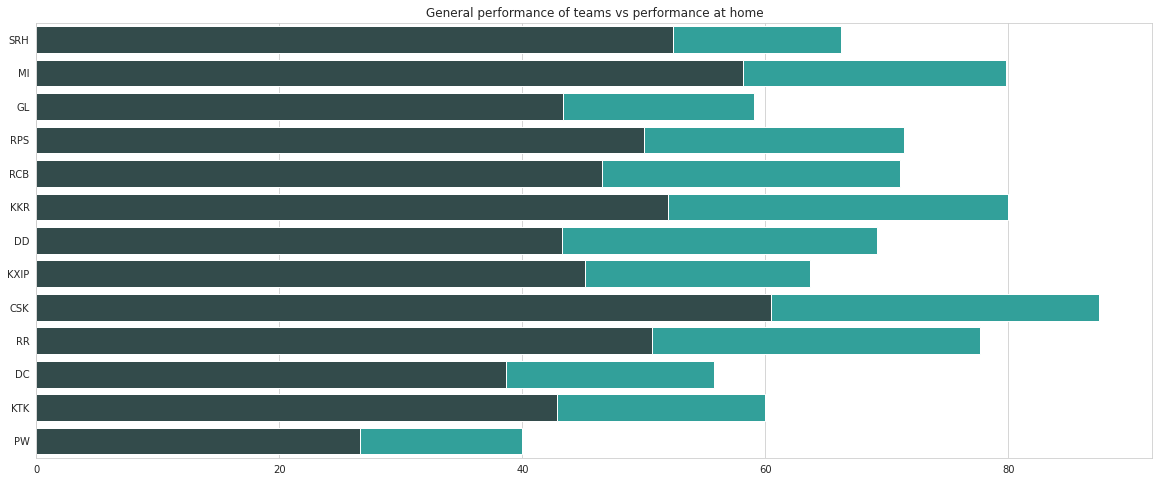

In [24]:
### checking the effect of home ground on the win percentage of teams
win_percentage_at_home = {}
for team in new_team_names:
  matches_won = len(matches[((matches['winner'] == team) & (matches['result'] == 'normal'))])
  matches_played = len(matches[((matches['team1'] == team) | (matches['team2'] == team) & (matches['home_ground']==team))])
  win_percent = (matches_won / matches_played) * 100
  win_percentage_at_home[team] = win_percent


plt.figure(figsize = (20,8))
sns.set_style("whitegrid")
sns.barplot(x = list(win_percentage_at_home.values()), y = list(win_percentage_at_home.keys()), color = 'lightseagreen').set(title = 'General performance of teams vs performance at home')
sns.barplot(x = list(win_percentage.values()), y = list(win_percentage.keys()), color = 'darkslategray')


plt.show()

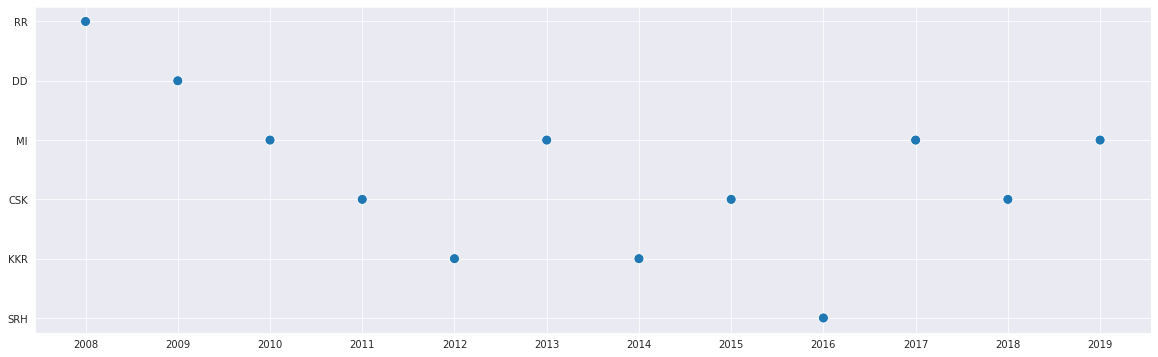

In [25]:
### displaying which team won most matches in different years
most_matches_won_year_wise = {}
for i, j in matches.groupby(by = 'season', sort = True):
  most_matches_won_year_wise[i] = j['winner'].value_counts().index[0]
  
sns.set_style("darkgrid")
plt.figure(figsize = (20,6))
sns.scatterplot(x = list(most_matches_won_year_wise.keys()), y = list(most_matches_won_year_wise.values()),\
                s = [100 for x in range(len(most_matches_won_year_wise))]).set(xticks = [x for x in range(2008, 2020)]),

plt.show()

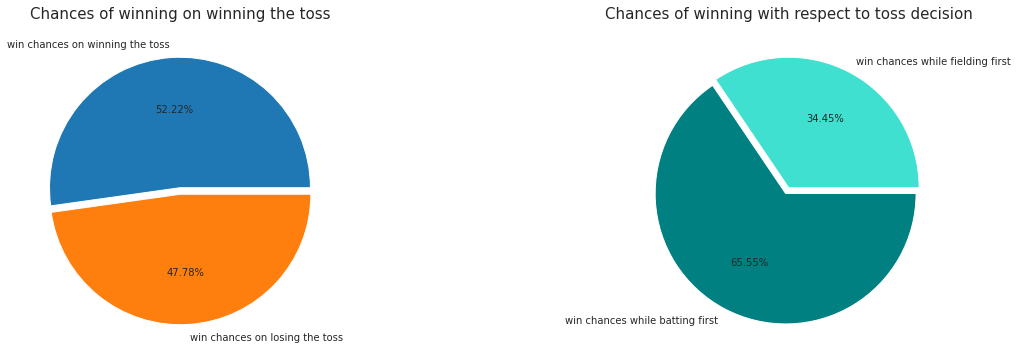

In [26]:
### displaying effect of toss on match result
win_percent_on_winning_toss = (len(matches[matches['winner'] == matches['toss_winner']])/ len(matches)) * 100
win_percent_on_fielding = (len(matches[((matches['toss_winner'] == matches['winner']) & (matches['toss_decision'] == "field"))])/ len(matches)) * 100

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
ax1 = axes[0]
ax2 = axes[1]
plt.style.use('seaborn-pastel')
ax1.pie(x = (win_percent_on_winning_toss, 100 - win_percent_on_winning_toss), explode = [0, 0.05],\
        labels = ['win chances on winning the toss', 'win chances on losing the toss'], radius = 1, autopct = '%1.2f%%')
ax1.set_title("Chances of winning on winning the toss", fontsize = 15)

ax2.pie(x = (win_percent_on_fielding, 100 - win_percent_on_fielding), explode = [0, 0.05],\
        labels = ['win chances while fielding first', 'win chances while batting first'], radius = 1, autopct = '%1.2f%%', colors=['turquoise', 'teal'])
ax2.set_title("Chances of winning with respect to toss decision", fontsize = 15)


plt.show()

In [27]:
matches.head(3)

,id,season,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,home_ground
0,1,2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,SRH
1,2,2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,RPS
2,3,2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,GL


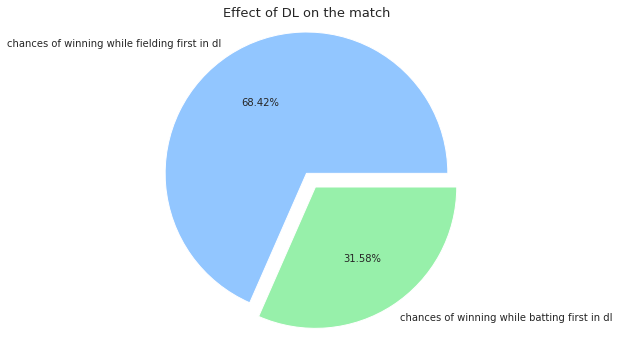

In [28]:
### Effect of DL on matches
matches_with_dl = len(matches[matches['dl_applied'] == 1])
matches_won_while_fielding_in_dl = len(matches[((matches['dl_applied'] == 1) & (matches['toss_decision'] == 'field'))])

chances_of_winning_while_fielding_in_dl = (matches_won_while_fielding_in_dl / matches_with_dl) * 100 

plt.figure(figsize = (20, 5))
plt.pie(x = (chances_of_winning_while_fielding_in_dl, 100-chances_of_winning_while_fielding_in_dl), explode = (0, 0.15), 
        labels = ['chances of winning while fielding first in dl', "chances of winning while batting first in dl"], 
        autopct = "%1.2f%%", radius = 1.3)

plt.title("Effect of DL on the match\n", fontsize = 13)
plt.show()

In [29]:
matches.head(3)

,id,season,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,home_ground
0,1,2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,SRH
1,2,2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,RPS
2,3,2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,GL


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


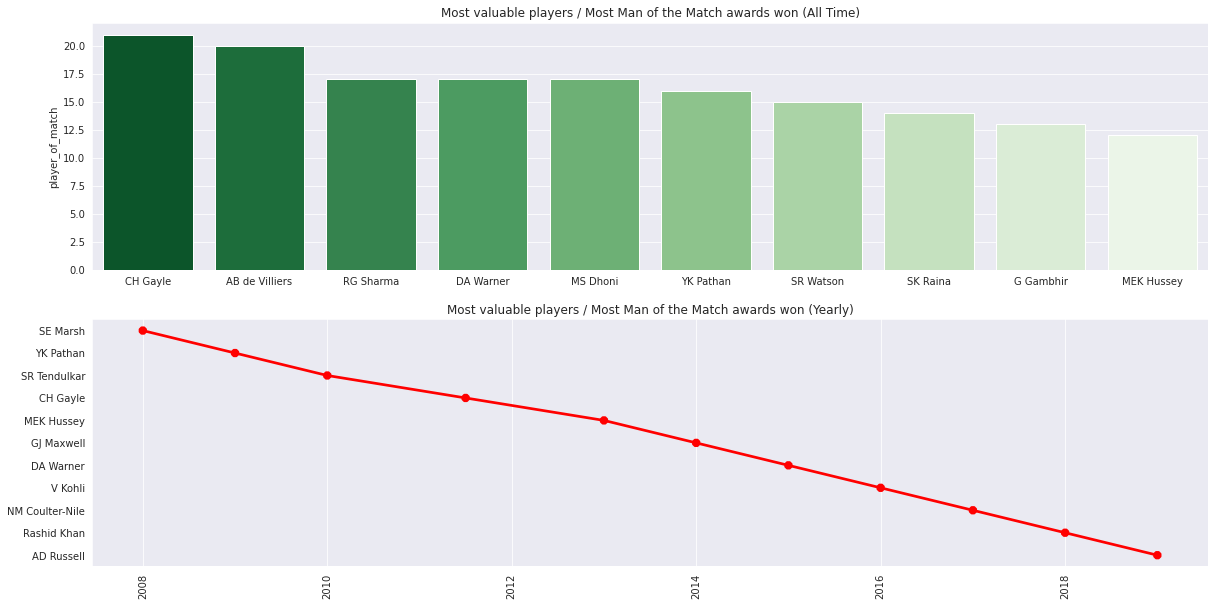

In [30]:
### Displaying most valuable players or the players with most man of match awards
most_player_of_the_matches = matches['player_of_match'].value_counts()[0:10]
most_player_of_the_match_yearly = {}

for i in range(2008, 2020):
  most_player_of_the_match_yearly[i] = matches[matches['season'] == i]['player_of_match'].value_counts().index[0]

fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20,10))
sns.set_style("whitegrid")
plt.xticks(rotation = 90)
sns.barplot(x = most_player_of_the_matches.index, y = most_player_of_the_matches, palette='Greens_r', ax=axes[0]).set(title = "Most valuable players / Most Man of the Match awards won (All Time)" )
sns.pointplot(list(most_player_of_the_match_yearly.keys()), list(most_player_of_the_match_yearly.values()), ax=axes[1], markers="8",\
              linestyles='-', errwidth=0, color='red',\
              linewidth=2, markersize=5).set(title = "Most valuable players / Most Man of the Match awards won (Yearly)")
plt.show()

In [31]:
matches.head(3)

,id,season,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,home_ground
0,1,2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,SRH
1,2,2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,RPS
2,3,2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,GL


In [32]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4


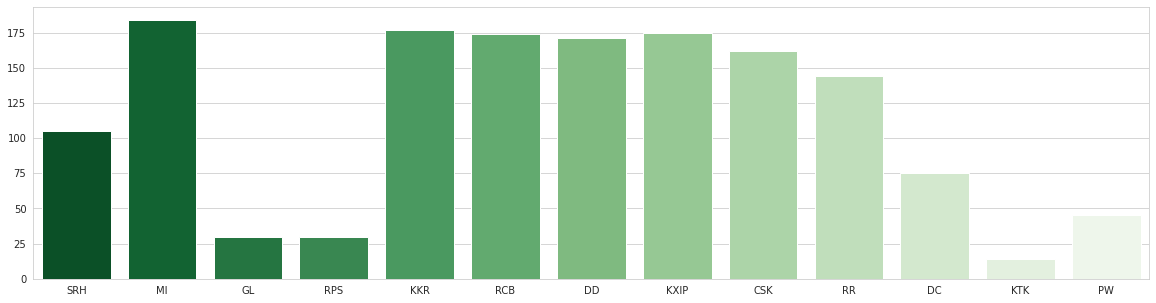

In [33]:
### Displaying the count of matches played by different teams
matches_played_by_different_teams = {}

for team in matches['team1'].unique():
  matches_played_by_different_teams[team] = len(matches[((matches['team1'] == team) | (matches['team2'] == team))])

plt.figure(figsize = (20, 5))
sns.barplot(x = list(matches_played_by_different_teams.keys()), y = list(matches_played_by_different_teams. values()), palette = "Greens_r")

In [34]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4


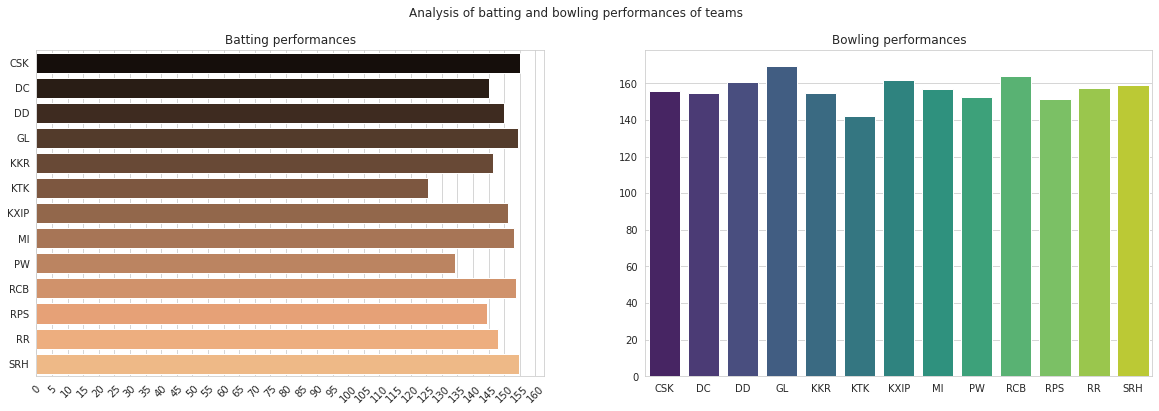

In [35]:
### Displaying the batting and bowling performances of different teams
runs_scored_by_teams_per_match = deliveries.groupby(by = 'batting_team')['batsman_runs'].sum() / pd.Series(matches_played_by_different_teams)
runs_given_by_teams = deliveries.groupby(by = 'bowling_team')['total_runs'].sum() / pd.Series(matches_played_by_different_teams)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
fig.suptitle("Analysis of batting and bowling performances of teams")

sns.barplot(x = runs_scored_by_teams_per_match, y = runs_scored_by_teams_per_match.index,\
            ax = axes[0], palette = "copper").set(title = "Batting performances")

axes[0].set_xticks([x for x in range(0, 161, 5)])
axes[0].set_xticklabels(labels = [x for x in range(0, 161, 5)], rotation = 45)

sns.barplot(x = runs_given_by_teams.index, y = runs_given_by_teams, ax = axes[1],\
            palette = "viridis").set(title = "Bowling performances")

plt.show()

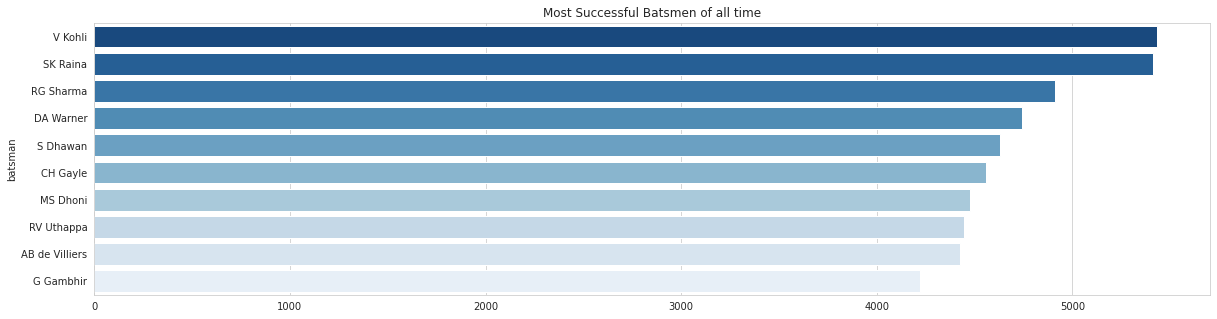

In [36]:
### Displaying the most successful batsmen in our data
names = deliveries.groupby(by = 'batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).index
runs = deliveries.groupby(by = 'batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).to_list()

plt.figure(figsize = (20,5))
sns.barplot(x = runs, y = names, palette = 'Blues_r').set(title = "Most Successful Batsmen of all time")
plt.show()

## Answering business related questions :

###Question 1 : Find out the most successful teams, players and factors contributing to the win or loss of a team
From our analysis, we have clearly observed that Mumbai Indians(MI), Chennai Super Kings(CSK) and Kolkata Knight Riders(KKR) are the three most successful teams having good overall figures with great win percentages both generally as well as when they are playing at their home grounds. These teams have good batting as well bowling figures and thereby score (on an average) better than other teams and also concede less runs. In addition to the above stated facts, they also have been the most successful teams by winning the most number of matches in more seasons than any other teams.

Talking about players, we can see that players like CH Gayle, AB de Villiers, RG Sharma have proved to be of great importance for their teams the most number of times. Also, V Kohli, SK Raina, etc are the most successful batsmen having the most runs in the tournament so they are some of the successful players too in IPL.

Now, some key findings on the factors which effect the match results according to our analysis is as follows:

• Home Ground of any of the two teams : The chances of win for a team playing at its home ground was found to be on an average 20% more than what it is generally.

• Team strength : successful teams like KKR, CSK, and MI are more likely to win than other teams.

• Effect of toss : From our analysis, teams which chose to bat first are more likely to win than teams which chose to bowl first.

• Effect of DL : In case of DL, teams which chose to bowl first have more chances of winning than the teams which bat in the second innings.

### Question 2 : Suggest teams or players which a company should endorse for its products
From our analysis, a company should use teams like CSK, KKR, or MI to endorse its products as they are the most successful teams so they are bound to have more fan following than others which is much needed to potentially increase the sales or to increase the revenue.

Discussing about players, the company should use players like CH Gayle, RG Sharma, AB de Villiers as they are some of the most successful players and should have a huge fan following. Also successful batsmen like V Kohli, SK Raina can also be used as they are the most successful batsmen of this league and hence would potentially increase the sales and revenue by drawing out new customers and also retaining the existing ones.